In [6]:
import os
import pandas as pd
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
import numpy as np

# Load test.csv for labels
label_df = pd.read_csv('/content/tamil_data/test.csv')

# Define the path where images are stored
image_dir = '/content/tamil_data/sol'

# Load images and their labels
image_size = (64, 64)  # Resizing images to 64x64
images = []
labels = []

for index, row in label_df.iterrows():
    # Remove '.bmp' from row['ID'] if it exists
    img_path = os.path.join(image_dir, row['ID'].replace(".bmp", "") + ".bmp")
    img = load_img(img_path, target_size=image_size, color_mode="grayscale")
    img_array = img_to_array(img) / 255.0  # Normalize the image
    images.append(img_array)
    labels.append(row['Class Label'])

# Convert to NumPy arrays
X = np.array(images)
y = np.array(labels)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Fully connected layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dense(len(np.unique(y)), activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 158s 222ms/step - accuracy: 0.0065 - loss: 5.0590 - val_accuracy: 0.0085 - val_loss: 5.0563
Epoch 2/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 187s 199ms/step - accuracy: 0.0076 - loss: 5.0550 - val_accuracy: 0.0068 - val_loss: 5.0567
Epoch 3/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 138s 194ms/step - accuracy: 0.0078 - loss: 5.0540 - val_accuracy: 0.0093 - val_loss: 5.0577
Epoch 4/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 137s 187ms/step - accuracy: 0.0083 - loss: 5.0497 - val_accuracy: 0.0073 - val_loss: 5.0596
Epoch 5/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 131s 187ms/step - accuracy: 0.0119 - loss: 5.0272 - val_accuracy: 0.0082 - val_loss: 5.0693
Epoch 6/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 133s 190ms/step - accuracy: 0.0198 - loss: 4.9596 - val_accuracy: 0.0062 - val_loss: 5.0968
Epoch 7/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 139s 186ms/step - accuracy: 0.0334 - loss: 4.8311 - val_accuracy: 0.0059 - val_loss: 5.1805
Epoch 8/10
702/702 ━━━━━━━━━━━━━━━━━━━━ 140s 183ms/step - accuracy: 0.0537 -

176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step


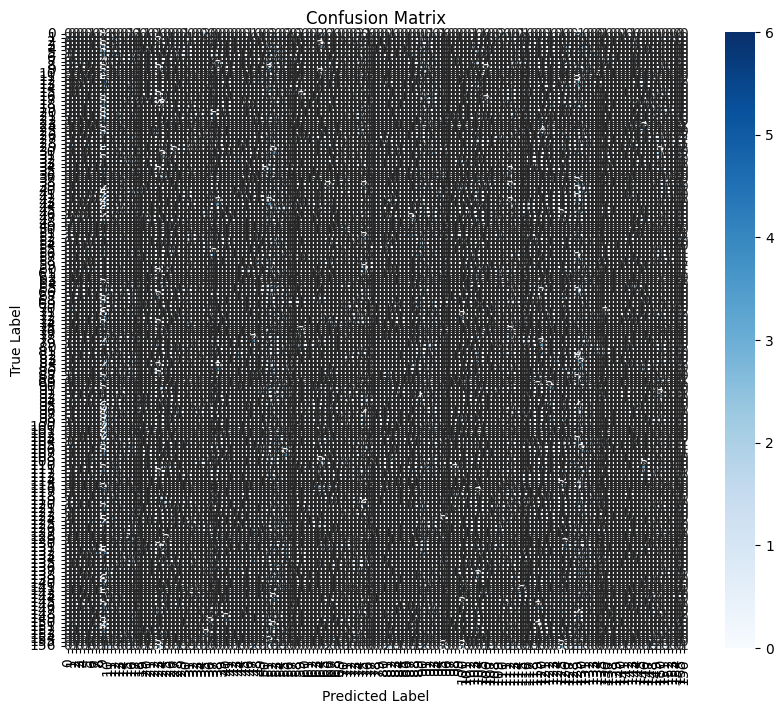

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Get predictions for the test set
y_pred = np.argmax(model.predict(X_test), axis=1)

# Compute confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [12]:
from sklearn.metrics import classification_report

# Print classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        45
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        34
           3       0.00      0.00      0.00        39
           4       0.00      0.00      0.00        50
           5       0.00      0.00      0.00        43
           6       0.00      0.00      0.00        33
           7       0.00      0.00      0.00        41
           8       0.00      0.00      0.00        40
           9       0.01      0.06      0.01        48
          10       0.00      0.00      0.00        41
          11       0.00      0.00      0.00        28
          12       0.00      0.00      0.00        44
          13       0.00      0.00      0.00        33
          14       0.00      0.00      0.00        25
          15       0.00      0.00      0.00        33
          16       0.00      0.00      0.00        33
   

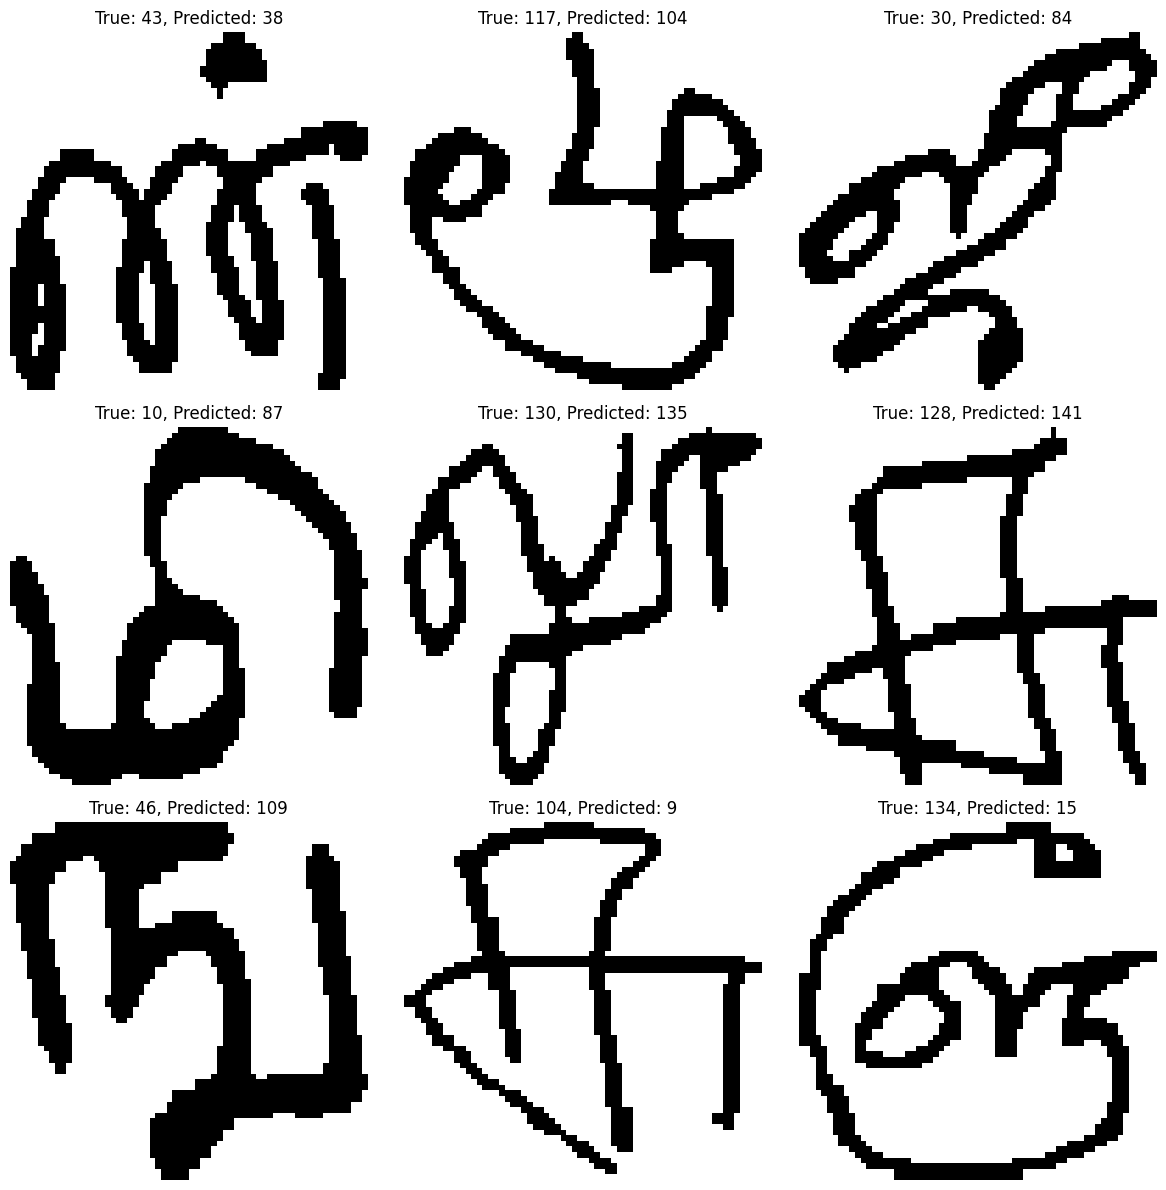

In [13]:
# Find misclassified indices
misclassified_indices = np.where(y_test != y_pred)[0]

# Plot a few misclassified images
plt.figure(figsize=(12, 12))
for i, index in enumerate(misclassified_indices[:9]):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[index].squeeze(), cmap='gray')
    plt.title(f"True: {y_test[index]}, Predicted: {y_pred[index]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


176/176 ━━━━━━━━━━━━━━━━━━━━ 10s 56ms/step


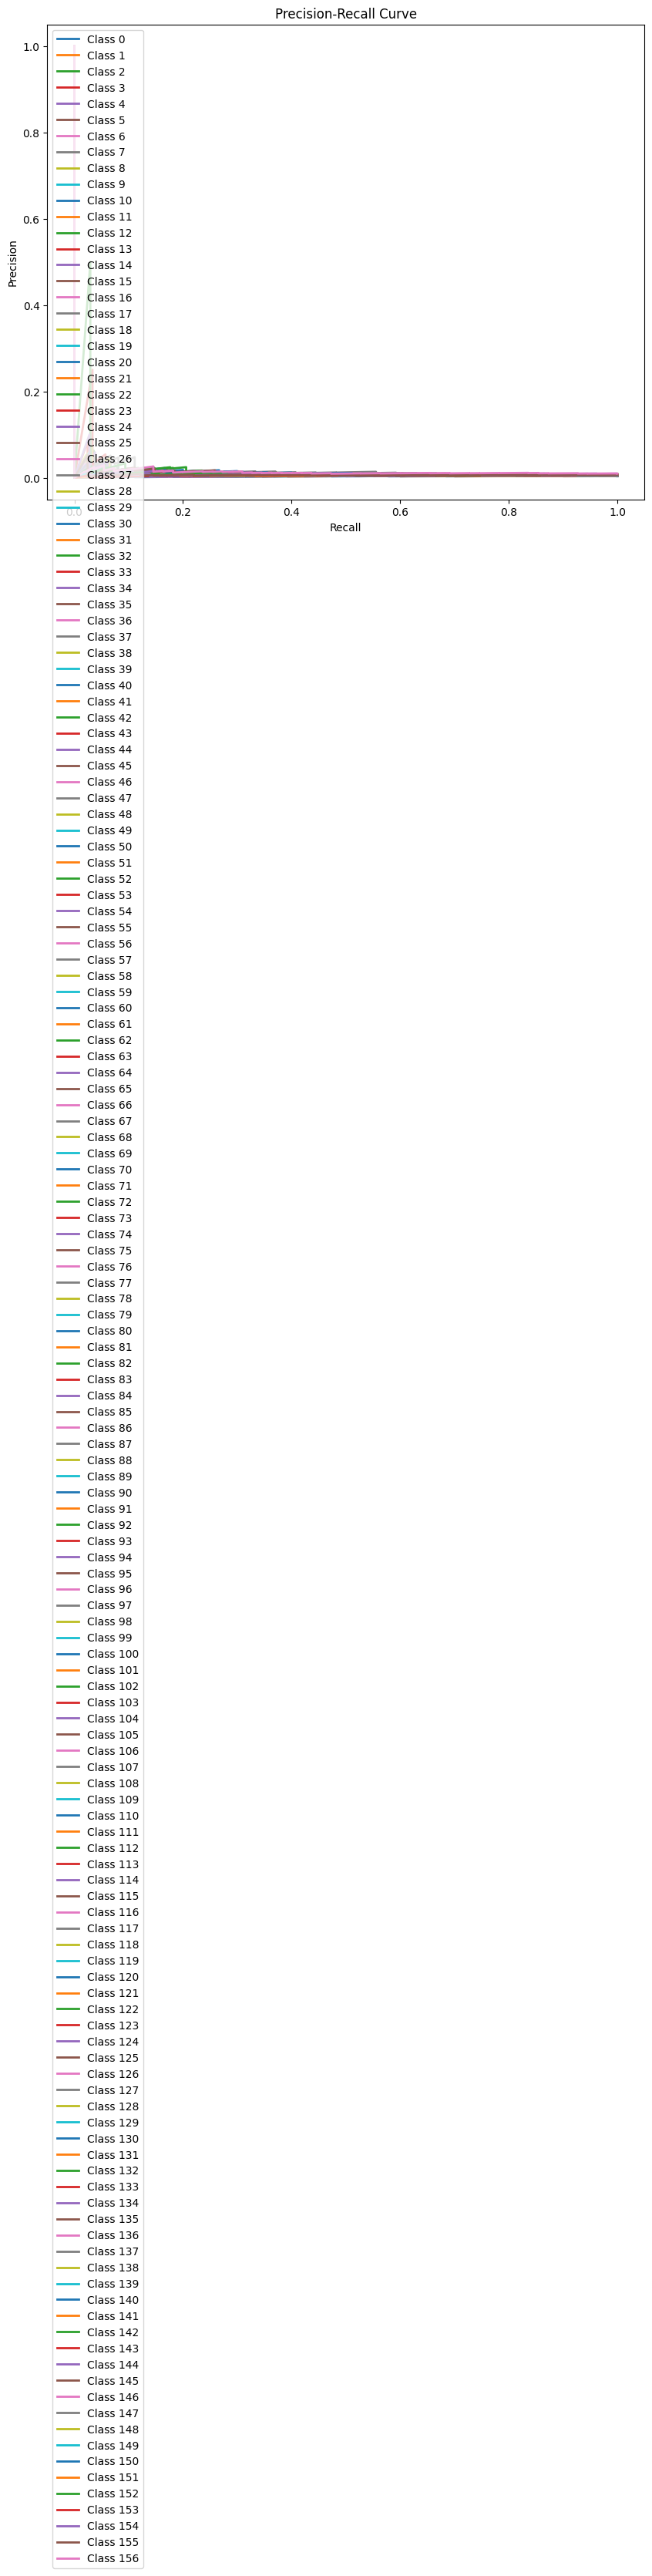

In [15]:
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import label_binarize

# Binarize labels for precision-recall curve
y_test_bin = label_binarize(y_test, classes=np.unique(y))
y_pred_prob = model.predict(X_test)

# Plot Precision-Recall curve for each class
plt.figure(figsize=(10, 8))
for i, class_label in enumerate(np.unique(y)):
    precision, recall, _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
    plt.plot(recall, precision, lw=2, label=f'Class {class_label}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


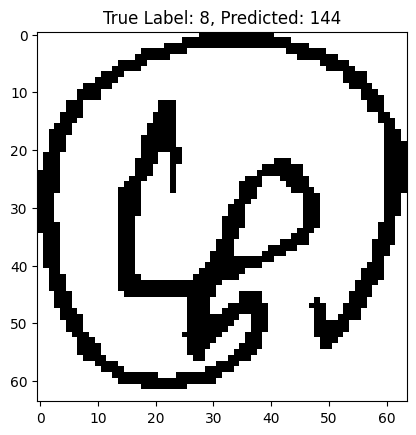

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


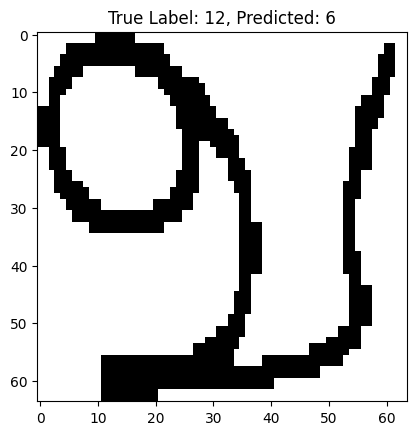

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


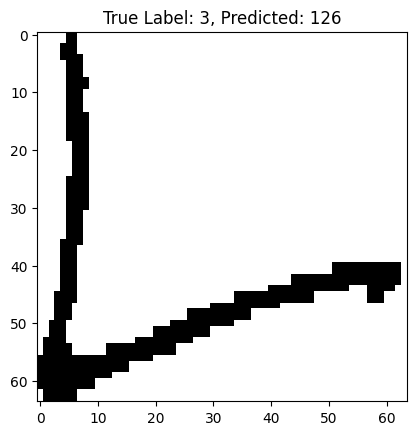

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


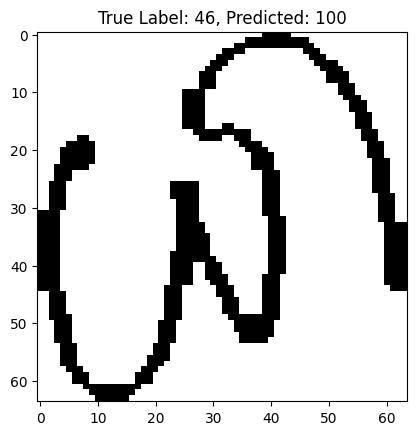

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


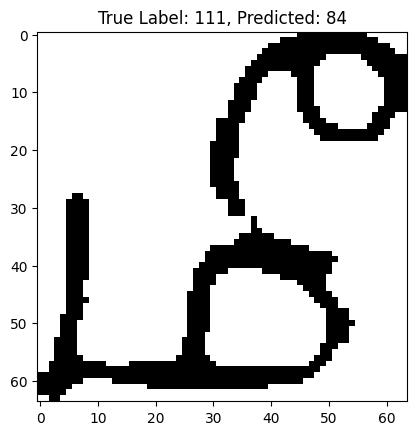

In [16]:
import matplotlib.pyplot as plt

# Get random images from the test set
for i in np.random.choice(len(X_test), 5):
    img = X_test[i]
    label = y_test[i]
    pred = np.argmax(model.predict(np.expand_dims(img, axis=0)))

    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f"True Label: {label}, Predicted: {pred}")
    plt.show()
